# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
import importlib
from dqn_agent import Agent
from plot import plot
import time
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
env = UnityEnvironment(file_name="./Banana.app")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [5]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [6]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [9]:
def dqn(n_episodes=1000, max_t=1000, eps_start=1.0, eps_end=0.001, eps_decay=0.95, solve_score=13):
    scores = []                         # list containing scores from each episode
    avg_scores = []                     # list containing average scores after each episode
    scores_window = deque(maxlen=100)   # last 100 scores
    eps = eps_start                     # initialize epsilon
    best_avg_score = -100000            # best score for a single episode
    time_start = time.time()            # track wall time over 100 episodes
    total_steps = 0                     # track steps taken over 100 episodes
    
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(action)[brain_name]
            next_state = env_info.vector_observations[0]
            reward = env_info.rewards[0]
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            score += reward
            state = next_state
            if done:
                break
        eps = max(eps_end, eps_decay*eps)   # decrease epsilon

        # update stats
        scores_window.append(score)         # save most recent score
        scores.append(score)                # save most recent score
        avg_score = np.mean(scores_window)  # average score over window
        avg_scores.append(avg_score)        # save most recent average score
        buffer_len = len(agent.memory)      # number of items in replay buffer
        if avg_score > best_avg_score:      # update best average score
            best_avg_score = avg_score

        # print stats
        print('\rEpisode {:6}\tAvg: {:.2f}\tBest: {:.2f}'
              '\tEps: {:.4f}\tBufferLen: {:6}'
              .format(i_episode, avg_score, best_avg_score, eps, buffer_len), end="")
        if i_episode % 100 == 0:
            # calculate wall time for last 100 episodes
            n_secs = int(time.time() - time_start)
            print('\rEpisode {:6}\tAvg: {:.2f}\tBest: {:.2f}'
                  '\tEps: {:.4f}\tBufferLen: {:6}\tSteps: {:7}\tSecs: {:4}'
                  .format(i_episode, avg_score, best_avg_score, eps, buffer_len, total_steps, n_secs))
            # reset counters
            time_start = time.time()
            total_steps = 0
        if avg_score >= solve_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'
                  .format(i_episode, avg_score))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoints/solved.pth')
            break
    plot(scores, avg_scores, [], [])

    return scores

### Training Agent

QNetwork(
  (fc1): Linear(in_features=37, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)
Episode    100	Avg: 3.54	Best: 3.55	Eps: 0.0059	BufferLen:  30000	Steps:       0	Secs:   75
Episode    200	Avg: 10.17	Best: 10.17	Eps: 0.0010	BufferLen:  60000	Steps:       0	Secs:   82
Episode    279	Avg: 13.03	Best: 13.03	Eps: 0.0010	BufferLen:  83700
Environment solved in 279 episodes!	Average Score: 13.03


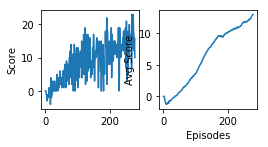

In [10]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
score = 0
print(agent.qnetwork_local)
scores = dqn(n_episodes=1000)

QNetwork(
  (fc1): Linear(in_features=37, out_features=64, bias=True)
  (fc2): Linear(in_features=64, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=4, bias=True)
)
Episode    100	Avg: 2.74	Best: 2.75	Eps: 0.0059	BufferLen:  30000	Steps:       0	Secs:   82
Episode    200	Avg: 7.70	Best: 7.70	Eps: 0.0010	BufferLen:  60000	Steps:       0	Secs:   76
Episode    300	Avg: 10.32	Best: 10.56	Eps: 0.0010	BufferLen:  90000	Steps:       0	Secs:   74
Episode    374	Avg: 13.01	Best: 13.01	Eps: 0.0010	BufferLen: 100000
Environment solved in 374 episodes!	Average Score: 13.01


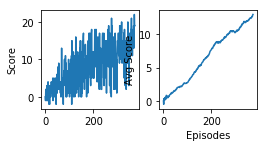

In [12]:
#network size 64
agent = Agent(state_size=state_size, action_size=action_size, seed=0, fc_units=64)
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
score = 0
print(agent.qnetwork_local)
scores = dqn(n_episodes=1000)

QNetwork(
  (fc1): Linear(in_features=37, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=32, bias=True)
  (fc3): Linear(in_features=32, out_features=4, bias=True)
)
Episode    100	Avg: 3.09	Best: 3.09	Eps: 0.0059	BufferLen:  30000	Steps:       0	Secs:   76
Episode    200	Avg: 9.05	Best: 9.11	Eps: 0.0010	BufferLen:  60000	Steps:       0	Secs:   77
Episode    300	Avg: 11.81	Best: 11.81	Eps: 0.0010	BufferLen:  90000	Steps:       0	Secs:   81
Episode    332	Avg: 13.00	Best: 13.00	Eps: 0.0010	BufferLen:  99600
Environment solved in 332 episodes!	Average Score: 13.00


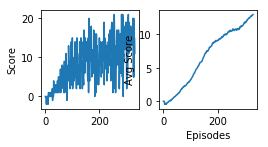

In [13]:
agent = Agent(state_size=state_size, action_size=action_size, seed=0, double_DQN=True)
env_info = env.reset(train_mode=True)[brain_name]
state = env_info.vector_observations[0]
score = 0
print(agent.qnetwork_local)
scores = dqn()

### Watch Trained Agent

In [ ]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoints/solved.pth', map_location='cpu'))
env_info = env.reset(train_mode=False)[brain_name]
state = env_info.vector_observations[0]
score = 0

while True:
    action = agent.act(state)
    env_info = env.step(action)[brain_name]
    next_state = env_info.vector_observations[0]
    reward = env_info.rewards[0]
    done = env_info.local_done[0]
    score += reward
    state = next_state
    if done:
        break
print("Score: {}".format(score))

When finished, you can close the environment.

In [ ]:
env.close()